In [145]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#data_process = pd.read_csv("entrada.csv")
alarm_var = pd.read_csv("alarm_list.csv")

In [146]:
def step_signal (low, high, s_low=0.2, s_high=0.2, larg_high_i=20, larg_high_f=100, larg_low_i=20, larg_low_f=100, prob_positivo=0.5, n=100):
       
    distrib = np.random.binomial(1,prob_positivo,n)
    signal = np.concatenate([np.random.uniform(high-s_high,high+s_high,np.random.randint(larg_high_i, larg_high_f)) if x == 1 else np.random.uniform(low-s_low,low+s_low,np.random.randint(larg_low_i, larg_low_f)) for x in distrib])
    return signal


In [187]:
def alarm_generate(DataFrame, list):
    '''alarm_generate is a function when return a vector '''
    x = []
    df_new = df.drop(['tout'],axis=1)

    for i in np.arange(10):
        x.append(df_new['x'+str(i)])
    
    t_delay = 0
    t_dead = 0
    log_alarm = np.arange(len(x))
    #print(x)
    if var_list["type_var"] == 'high':
        for i in np.arange(len(x)):
            if x[i] > var_list["limit"]:
                t_dead = 0
                t_delay = t_delay + 3/len(x)
                if t_delay >= var_list["delay_time"]:
                    log_alarm[i] = 1
                else:
                    log_alarm[i] = 0
            else:
                if log_alarm[i-1] == 1:
                    t_dead = t_dead + 3/len(x)
                    if t_dead >= var_list["dead_band_delay"]:
                        log_alarm[i] = 0
                        t_delay = 0
                        t_dead = 0
                    else:
                        log_alarm[i] = 1
                else:
                    t_delay = 0
                    t_dead = 0
                    log_alarm[i] = 0
    else:
        for i in np.arange(len(x)):
            if x[i] < limit:
                t_dead = 0
                t_delay = t_delay + 3/len(x)
                if t_delay >= var_list["delay_time"]:
                    log_alarm[i] = 1
                else:
                    log_alarm[i] = 0
            else:
                if log_alarm[i-1] == 1:
                    t_dead = t_dead + 3/len(x)
                    if t_dead >= var_list["dead_band_delay"]:
                        log_alarm[i] = 0
                        t_delay = 0
                        t_dead = 0
                    else:
                        log_alarm[i] = 1
                else:
                    t_delay = 0
                    t_dead = 0
                    log_alarm[i] = 0

    return log_alarm

In [148]:
x_ = []
for i in np.arange(10):
    x_.append(step_signal(3,7))

In [149]:
for i in np.arange(10):
    if len(x_[0]) > len(x_[i]):
        if x_[i][-1] >= 2.8 and x_[i][-1] <= 3.2:
            x_[i] = np.concatenate((x_[i],np.random.uniform(3-0.2,3+0.2,len(x_[0])-len(x_[i]))))
        elif x_[i][-1] >= 6.7 and x_[i][-1] <= 7.3:
            x_[i] = np.concatenate((x_[i],np.random.uniform(7-0.3,7+0.3,len(x_[0])-len(x_[i]))))
    else:
        delete = np.nonzero(x_[i][len(x_[0]):])
        x_[i] = np.delete(x_[i],delete)
    
    
limit = 5 
type_ = 'high' 
delay_time = 100*3/len(x_[0])
dead_band_delay = 70*3/len(x_[0])
t_delay = 0
df = pd.DataFrame()
for i in np.arange(10):
    df['x'+str(i)] = x_[i]
    
tout = np.arange(0,3,3/len(x_[0]),dtype=float)    
df.insert(0,'tout',tout)

In [190]:
print(x_)
df.head()

[array([3.00429666, 2.93585762, 3.11160255, ..., 2.91191003, 3.15936666,
       3.04098678]), array([2.9424631 , 3.19542065, 2.93260783, ..., 7.05454557, 6.80342247,
       7.12767072]), array([2.99868307, 3.01949537, 3.10562764, ..., 2.95997608, 3.12843081,
       2.93394482]), array([2.80943318, 3.02187597, 6.91124122, ..., 7.08868546, 7.17579894,
       7.0594801 ]), array([3.05970278, 2.88946879, 3.17600607, ..., 6.75371529, 7.23195889,
       6.87128506]), array([6.81058373, 6.93119396, 6.97917589, ..., 6.73042213, 7.27506534,
       7.25662859]), array([7.02880244, 6.90638256, 7.05569637, ..., 2.92766816, 2.89242742,
       3.01214419]), array([6.84387205, 6.83503449, 7.18391718, ..., 2.92638281, 3.15727133,
       3.06494037]), array([3.09825809, 3.05660733, 3.16151261, ..., 2.96334007, 2.87205715,
       3.06610277]), array([2.87779482, 3.1277982 , 3.05759806, ..., 6.851514  , 7.09657278,
       7.06910768])]


,tout,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9
0,0.000000,3.004297,2.942463,2.998683,2.809433,3.059703,6.810584,7.028802,6.843872,3.098258,2.877795
1,0.000498,2.935858,3.195421,3.019495,3.021876,2.889469,6.931194,6.906383,6.835034,3.056607,3.127798
2,0.000995,3.111603,2.932608,3.105628,6.911241,3.176006,6.979176,7.055696,7.183917,3.161513,3.057598
3,0.001493,3.050958,3.198007,2.863864,7.007430,2.868638,6.972945,7.157224,7.160140,3.122414,3.077298
4,0.001990,3.136857,3.181154,3.027528,6.918868,3.057929,6.844666,7.074015,6.851959,3.196594,3.122147


In [193]:
var_list = {
    "limit": 5,
    "type_var":'high', 
    "delay_time" : 100*3/len(x_[0]), 
    "dead_band_delay" : 70*3/len(x_[0])
}

# log = []
# for i in np.arange(10):
#     log.append(alarm_generate(df, var_list))
    

df_log = pd.DataFrame
df_log = alarm_generate(x_, var_list)

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [152]:
df_log = pd.DataFrame()
for i in np.arange(10):
    df_log['Var_'+str(i)] = log[i]

In [153]:
df_log.head()

,Var_0,Var_1,Var_2,Var_3,Var_4,Var_5,Var_6,Var_7,Var_8,Var_9


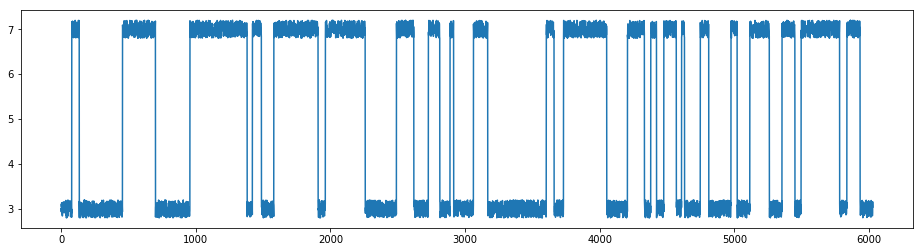

In [154]:
plt.figure(figsize=(16,4))
plt.plot(df['x0'])
plt.plot(df_log['Var_0']*4+3)

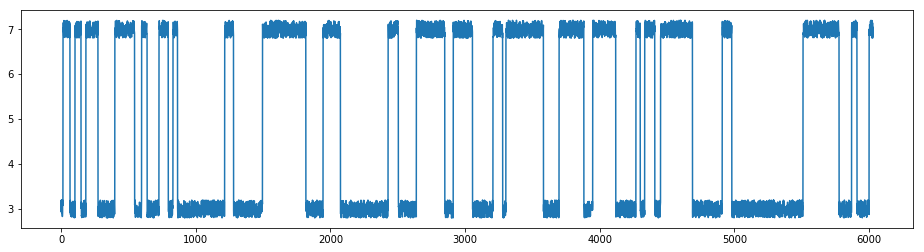

In [155]:
plt.figure(figsize=(16,4))
plt.plot(df['x1'])
plt.plot(df_log['Var_1']*4+3)

In [141]:
?alarm_generate

In [183]:
x1 = []

df_new = df.drop(['tout'],axis=1)

for i in np.arange(10):
    x1.append(df_new['x'+str(i)])
    

#df_new = df.drop(['tout'],axis=1).as_matrix()

In [184]:
x1

[0       3.004297
 1       2.935858
 2       3.111603
 3       3.050958
 4       3.136857
 5       2.894635
 6       2.958750
 7       2.946578
 8       3.083372
 9       2.843221
 10      2.924778
 11      2.994054
 12      2.968355
 13      3.030574
 14      2.937890
 15      3.093144
 16      3.154332
 17      2.998088
 18      2.938756
 19      3.113849
 20      3.143737
 21      2.971442
 22      2.912035
 23      3.073197
 24      3.153313
 25      3.087602
 26      2.997832
 27      3.015338
 28      3.105347
 29      2.939098
           ...   
 6000    3.177829
 6001    3.019380
 6002    2.857606
 6003    2.842228
 6004    2.913122
 6005    3.037407
 6006    2.942015
 6007    3.121203
 6008    2.929938
 6009    3.065920
 6010    3.114182
 6011    3.101824
 6012    2.955589
 6013    3.126469
 6014    2.985437
 6015    2.817965
 6016    3.154448
 6017    3.187421
 6018    3.060107
 6019    3.164072
 6020    3.086407
 6021    3.122175
 6022    3.058444
 6023    2.995994
 6024    3

x1 

In [176]:
np.arange(10)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])